In [4]:
import pandas as pd
df = pd.read_csv("Synthetic_2_classifiers.csv")

In [5]:
df.head()

,x,y,label,classifierA_predicted_label,classifierB_predicted_label
0,1.049671,-0.013826,dog,cat,cat
1,1.064769,0.152752,dog,cat,cat
2,0.976584,-0.022516,dog,cat,cat
3,1.157920,0.078090,dog,cat,cat
4,0.953051,0.056051,dog,cat,cat


In [6]:
#Task1a

# Importing necessary libraries from Bokeh and Pandas
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
import pandas as pd

# Loading data from a CSV file into a pandas DataFrame
df = pd.read_csv('Synthetic_2_classifiers.csv')

# Assigning fill colors based on specific conditions related to labels and predicted labels
df['fill_colors'] = df.apply(
    lambda row: 'black' if row['label'] == 'dog' and row['classifierA_predicted_label'] == 'dog' and row['classifierB_predicted_label'] == 'dog'
    else 'gray' if row['label'] == 'dog' and (row['classifierA_predicted_label'] == 'dog' or row['classifierB_predicted_label'] == 'dog')
    else 'black' if row['label'] == 'cat' and row['classifierA_predicted_label'] == 'cat' and row['classifierB_predicted_label'] == 'cat'
    else 'gray' if row['label'] == 'cat' and (row['classifierA_predicted_label'] == 'cat' or row['classifierB_predicted_label'] == 'cat')
    else 'white', axis=1
)

# Assigning border colors based on the true label
df['border_colors'] = df.apply(
    lambda row: 'red' if row['label'] == 'dog' else 'blue', axis=1
)

# Creating a ColumnDataSource object, which is used as a data source for the plot
source = ColumnDataSource(df)

# Creating a figure object with specified width and height
p = figure(width=800, height=600)

# Adding a scatter plot to the figure with x and y coordinates from the data source,
# setting the size, fill color, border color, and line width of the markers
p.scatter(
    x="x",
    y="y",
    source=source,
    size=8,
    fill_color="fill_colors",
    line_color="border_colors",
    line_width=2
)

# Customizing the plot's title and axis labels
p.title.text = "Classifier A vs Classifier B Accuracy Scatter Plot"
p.xaxis.axis_label = "X Coordinate"
p.yaxis.axis_label = "Y Coordinate"

# Configuring the output to display in a Jupyter notebook and displaying the plot
output_notebook()
show(p)


Loading BokehJS ...

In [11]:
# Importing necessary libraries from Bokeh and Pandas
from bokeh.plotting import figure, show
import pandas as pd

# Loading data from a CSV file into a pandas DataFrame
df = pd.read_csv('Synthetic_2_classifiers.csv')

# Defining a function to create the plot
def plot():
    # Calculating a boolean column 'both_correct' to check if both classifiers predicted the label correctly
    df['both_correct'] = (df['label'] == df['classifierA_predicted_label']) & (df['label'] == df['classifierB_predicted_label'])
    
    # Calculating the total number of 'dog' and 'cat' labels
    Total_Red = (df['label'] == 'dog').sum()
    Total_Blue = (df['label'] == 'cat').sum()

    # Counting correct predictions of 'dog' and 'cat' by both classifiers
    count_dog_A = ((df['classifierA_predicted_label'] == 'dog') & (df['label'] == 'dog')).sum()
    count_dog_B = ((df['classifierB_predicted_label'] == 'dog') & (df['label'] == 'dog')).sum()
    count_cat_A = ((df['classifierA_predicted_label'] == 'cat') & (df['label'] == 'cat')).sum()
    count_cat_B = ((df['classifierB_predicted_label'] == 'cat') & (df['label'] == 'cat')).sum()
    
    # Counting the number of correct predictions where both classifiers agreed with the true label
    A = B = ((df['both_correct'] & (df['label'] == 'dog'))).sum()
    C = D = ((df['both_correct'] & (df['label'] == 'cat'))).sum()

    # Defining categories and corresponding x-coordinates for the bars
    categories = ['Classifier A Correctly predicted dogs', 'Classifier B Correctly predicted dogs',
                  'Classifier A Correctly predicted cats', 'Classifier B Correctly predicted cats']
    bar_x = [0.7, 1.3, 2.7, 3.3]
    bar_width = 0.2

    # Creating a figure object for the bar chart
    p = figure(x_range=categories, title="Bar Chart Example", width=900)

    # Plotting bars for total predictions where both classifiers agreed with the true label
    p.vbar(x=bar_x, top=[A, B, C, D], width=bar_width, fill_color="gray", line_color=None, legend_label="Total Predictions")
    
    # Plotting background bars representing total counts of 'dog' and 'cat' labels
    p.vbar(x=[1, 1], top=[Total_Red] * 2, width=1, fill_color="red", line_color=None, legend_label="Total Red", alpha=0.10)
    p.vbar(x=[3, 3], top=[Total_Blue] * 2, width=1, fill_color="blue", line_color=None, legend_label="Total Blue", alpha=0.10)

    # Plotting bars for correct predictions by each classifier
    p.vbar(x=bar_x, top=[count_dog_A, count_dog_B, count_cat_A, count_cat_B], width=bar_width, fill_color="black", line_color=None, alpha=0.7, legend_label="Correct Predictions")

    # Customizing axes labels and plot title
    p.xaxis.axis_label = "Categories"
    p.yaxis.axis_label = "Count"
    p.title.align = "center"
    p.title.text_font_size = "20px"
    p.legend.title = "Legend"

    # Displaying the plot
    show(p)

# Calling the function to execute the plot creation and display
plot()


In [8]:
#Task1c

# Importing necessary libraries from Bokeh and Pandas
import pandas as pd
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.layouts import column
from bokeh.models import LassoSelectTool, HoverTool, TapTool, CustomJS
from bokeh.io import output_notebook

# Enable output display in a Jupyter notebook
output_notebook()

# Load data from a CSV file into a pandas DataFrame
df = pd.read_csv('Synthetic_2_classifiers.csv')

# Define color assignment for scatter plot points based on the true label and predictions
df['fill_colors'] = df.apply(
    lambda row: 'black' if row['label'] == 'dog' and row['classifierA_predicted_label'] == 'dog' and row['classifierB_predicted_label'] == 'dog'
    else 'gray' if row['label'] == 'dog' and (row['classifierA_predicted_label'] == 'dog' or row['classifierB_predicted_label'] == 'dog')
    else 'black' if row['label'] == 'cat' and row['classifierA_predicted_label'] == 'cat' and row['classifierB_predicted_label'] == 'cat'
    else 'gray' if row['label'] == 'cat' and (row['classifierA_predicted_label'] == 'cat' or row['classifierB_predicted_label'] == 'cat')
    else 'white', axis=1
)

# Assign border colors based on the true label
df['border_colors'] = df.apply(
    lambda row: 'red' if row['label'] == 'dog' else 'blue', axis=1
)

# Create a ColumnDataSource, which is a Bokeh object used as a data source for plots
source = ColumnDataSource(df)

# Create a scatter plot with interactive tools
scatter_plot = figure(width=800, height=600, title="Projected Data Space",
                      tools=[LassoSelectTool(), HoverTool(tooltips=[("Label", "@label"),
                                                                    ("Classifier A", "@classifierA_predicted_label"),
                                                                    ("Classifier B", "@classifierB_predicted_label")]),
                             TapTool()])

# Add scatter plot points with specified size, color, and transparency
scatter_plot.scatter(
    x="x",
    y="y",
    source=source,
    size=6,  # Size of the scatter points
    fill_color="fill_colors",  # Fill color based on classifier agreement
    line_color="border_colors",  # Border color based on the true label
    line_width=2,  # Width of the point borders
    alpha=0.6  # Transparency of the points
)

# Initialize the data source for the bar plot with placeholder values
bar_source = ColumnDataSource(data={'classifiers': ['Classifier A', 'Classifier B'],
                                    'both': [0, 0],
                                    'one': [0, 0],
                                    'none': [0, 0]})

# Create a bar plot to visualize classifier performance
bar_plot = figure(x_range=['Classifier A', 'Classifier B'], height=400, width=800, title="Classifier Performance",
                  toolbar_location=None, tools="")

# Add bars representing the number of correct predictions by both classifiers
bar_plot.vbar(x='classifiers', top='both', source=bar_source, width=0.3, color='black', legend_label='Both Classifiers')
# Add bars representing the number of predictions where only one classifier was correct
bar_plot.vbar(x='classifiers', top='one', source=bar_source, width=0.3, color='gray', legend_label='One Classifier',
              bottom='both')
# Add bars representing the number of predictions where neither classifier was correct
bar_plot.vbar(x='classifiers', top='none', source=bar_source, width=0.3, color='lightgray', legend_label='None Classified',
              bottom='one')

# Customize the bar plot
bar_plot.x_range.range_padding = 0.1
bar_plot.xgrid.grid_line_color = None
bar_plot.legend.title = 'Categories'
bar_plot.legend.label_text_font_size = '12pt'

# JavaScript callback to update the bar plot based on the selected points in the scatter plot
callback = CustomJS(args=dict(source=source, bar_source=bar_source), code="""
    function countSelected(source, indices) {
        let both = 0, one = 0, none = 0;
        for (let i = 0; i < indices.length; i++) {
            let index = indices[i];
            let classifierA_correct = source.data['classifierA_predicted_label'][index] === source.data['label'][index];
            let classifierB_correct = source.data['classifierB_predicted_label'][index] === source.data['label'][index];

            if (classifierA_correct && classifierB_correct) {
                both++;
            } else if (classifierA_correct || classifierB_correct) {
                one++;
            } else {
                none++;
            }
        }
        return [both, one, none];
    }

    let counts = countSelected(source, source.selected.indices);
    
    let both_A = counts[0];
    let one_A = counts[1];
    let none_A = counts[2];
    
    bar_source.data = {
        'classifiers': ['Classifier A', 'Classifier B'],
        'both': [both_A, both_A],  // same count for both classifiers since "both" means both are correct
        'one': [one_A, one_A],  // same count for both classifiers since "one" means one of them is correct
        'none': [none_A, none_A]  // same count for both classifiers since "none" means neither is correct
    };
    bar_source.change.emit();  // Trigger the update of the bar plot
""")

# Attach the JavaScript callback to update the bar plot when points in the scatter plot are selected
source.selected.js_on_change('indices', callback)

# Arrange the scatter plot and bar plot in a column layout and display them
layout = column(scatter_plot, bar_plot)
show(layout)


Loading BokehJS ...

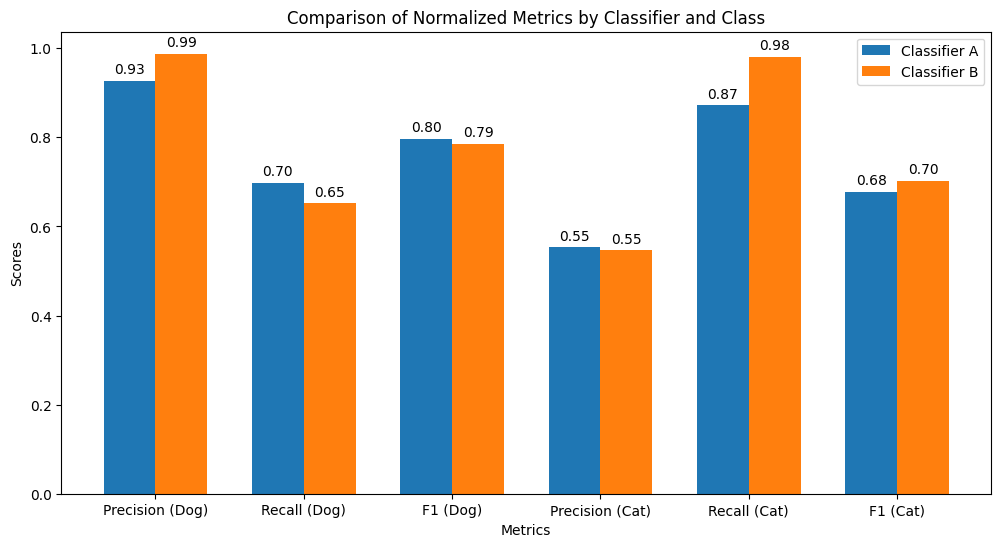

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Synthetic_2_classifiers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

# Let's calculate metrics for each classifier
def calculate_metrics(true_labels, predicted_labels, positive_label):
    TP = np.sum((true_labels == positive_label) & (predicted_labels == positive_label))
    FP = np.sum((true_labels != positive_label) & (predicted_labels == positive_label))
    FN = np.sum((true_labels == positive_label) & (predicted_labels != positive_label))
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1_score

# True labels and predicted labels for Classifier A and B
true_labels = data['label'].values
predicted_labels_A = data['classifierA_predicted_label'].values
predicted_labels_B = data['classifierB_predicted_label'].values

# Calculate metrics for Classifier A
precision_dog_A, recall_dog_A, f1_dog_A = calculate_metrics(true_labels, predicted_labels_A, 'dog')
precision_cat_A, recall_cat_A, f1_cat_A = calculate_metrics(true_labels, predicted_labels_A, 'cat')

# Calculate metrics for Classifier B
precision_dog_B, recall_dog_B, f1_dog_B = calculate_metrics(true_labels, predicted_labels_B, 'dog')
precision_cat_B, recall_cat_B, f1_cat_B = calculate_metrics(true_labels, predicted_labels_B, 'cat')

# Prepare data for bar chart
metrics_A = [precision_dog_A, recall_dog_A, f1_dog_A, precision_cat_A, recall_cat_A, f1_cat_A]
metrics_B = [precision_dog_B, recall_dog_B, f1_dog_B, precision_cat_B, recall_cat_B, f1_cat_B]

labels = ['Precision (Dog)', 'Recall (Dog)', 'F1 (Dog)', 'Precision (Cat)', 'Recall (Cat)', 'F1 (Cat)']

# Plotting the stacked bar chart
x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars_A = ax.bar(x - width/2, metrics_A, width, label='Classifier A')
bars_B = ax.bar(x + width/2, metrics_B, width, label='Classifier B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Normalized Metrics by Classifier and Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

add_labels(bars_A)
add_labels(bars_B)

plt.show()
